# NBA Market Share Analysis Group Project

In [2]:
## Import Dependencies

In [3]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats

## Import Files

#### <font color = blue> Import Original Historical Team Valuation XLS File

In [4]:
FilePath = "Resources/TeamValuations_orig.csv"

TeamVal_orig_DF = pd.read_csv(FilePath)

# print(f'Col Types:\n{TeamVal_orig_DF.dtypes}')

#### <font color = blue> Import Denormalized CSV File generated using Tableu plug-in

In [5]:
FilePath = "Resources/TeamValuations_denormalized_for_BoxPlot.csv"

TeamVal_deNorm_DF = pd.read_csv(FilePath)

# print(f'Col Types:\n{TeamVal_deNorm_DF.dtypes}')

#### <font color = blue> Clean Data

In [6]:
TeamVal_orig_DF.fillna(0 , inplace = True)
TeamVal_deNorm_DF.fillna(0 , inplace = True)

In [7]:
TeamVal_orig_DF.head(10)

,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,New York Knicks,395.0,392.0,398.0,401.0,494,543,592,608,613,586,655,780,1100,1400,2500,3000,3300
1,Los Angeles Lakers,390.0,426.0,426.0,447.0,510,529,568,560,584,607,643,900,1000,1350,2600,2700,3000
2,Golden State Warriors,168.0,166.0,176.0,188.0,228,243,267,309,335,315,363,450,555,750,1300,1900,2600
3,Chicago Bulls,314.0,329.0,323.0,356.0,368,409,461,500,504,511,511,600,800,1200,2000,2300,2500
4,Boston Celtics,212.0,218.0,274.0,290.0,334,353,367,391,447,433,452,482,730,875,1700,2100,2200
5,Los Angeles Clippers,154.0,170.0,205.0,208.0,224,248,285,294,297,295,305,324,430,575,1600,2000,2000
6,Brooklyn Nets,179.0,169.0,218.0,244.0,296,271,325,338,295,269,312,357,530,780,1500,1700,1800
7,Houston Rockets,206.0,234.0,255.0,278.0,369,422,439,462,469,470,443,453,568,775,1250,1500,1650
8,Dallas Mavericks,167.0,211.0,304.0,338.0,374,403,463,461,466,446,438,497,685,765,1150,1400,1450
9,Cleveland Cavaliers,185.0,202.0,222.0,258.0,298,356,380,455,477,476,355,329,434,515,915,1100,1200


In [8]:
TeamVal_deNorm_DF.tail(10)

,Market_Size,Market_Rank,Item,Year,Valuation
500,Small,30,New Orleans Pelicans,2008,272.0
501,Small,30,New Orleans Pelicans,2009,285.0
502,Small,30,New Orleans Pelicans,2010,267.0
503,Small,30,New Orleans Pelicans,2011,280.0
504,Small,30,New Orleans Pelicans,2012,285.0
505,Small,30,New Orleans Pelicans,2013,340.0
506,Small,30,New Orleans Pelicans,2014,420.0
507,Small,30,New Orleans Pelicans,2015,650.0
508,Small,30,New Orleans Pelicans,2016,650.0
509,Small,30,New Orleans Pelicans,2017,750.0


In [9]:
TeamVal_deNorm_DF.head(10)

,Market_Size,Market_Rank,Item,Year,Valuation
0,Big,1,New York Knicks,2001,395.0
1,Big,1,New York Knicks,2002,392.0
2,Big,1,New York Knicks,2003,398.0
3,Big,1,New York Knicks,2004,401.0
4,Big,1,New York Knicks,2005,494.0
5,Big,1,New York Knicks,2006,543.0
6,Big,1,New York Knicks,2007,592.0
7,Big,1,New York Knicks,2008,608.0
8,Big,1,New York Knicks,2009,613.0
9,Big,1,New York Knicks,2010,586.0


# <font color = red> Market Rank vs Team Valuation Analysis </font>
***

### <font color = blue> Run ANOVA Test:
* $H_0$: Team valuation means across the different Market Ranks (Big, Med, Small) are NOT statistically different.
* $H$: Team valuation means across the different Market Ranks (Big, Med, Small) are statistically diffent - market size matters.

In [10]:
#####################################################
# Extract Valuation values for each Market Size group
#####################################################

Big_Val   = TeamVal_deNorm_DF[TeamVal_deNorm_DF["Market_Size"] == "Big"]["Valuation"]

Mid_Val   = TeamVal_deNorm_DF[TeamVal_deNorm_DF["Market_Size"] == "Mid"]["Valuation"]

Small_Val = TeamVal_deNorm_DF[TeamVal_deNorm_DF["Market_Size"] == "Small"]["Valuation"]

In [11]:
########################
# Perform a 1-way ANOVA
########################

ANOVA_Test = stats.f_oneway(Big_Val , Mid_Val , Small_Val)
ANOVA_Test

F_onewayResult(statistic=14.916928984438803, pvalue=5.071113482370098e-07)

### <font color = blue> Generate Box Plot Histogram of Market Rank Groups vs Team Valuations

In [12]:
# Assign Box Plot Colors

Plot_Colors = ['#78C850',  # Grass
               '#F08030',  # Fire
               '#6890F0',  # Water
               '#A8B820',  # Bug
               '#A8A878',  # Normal
               '#A040A0',  # Poison
               '#F8D030',  # Electric
               '#E0C068',  # Ground
               '#EE99AC',  # Fairy
               '#C03028',  # Fighting
               '#F85888',  # Psychic
               '#B8A038',  # Rock
               '#705898',  # Ghost
               '#98D8D8',  # Ice
               '#7038F8',  # Dragon
              ]

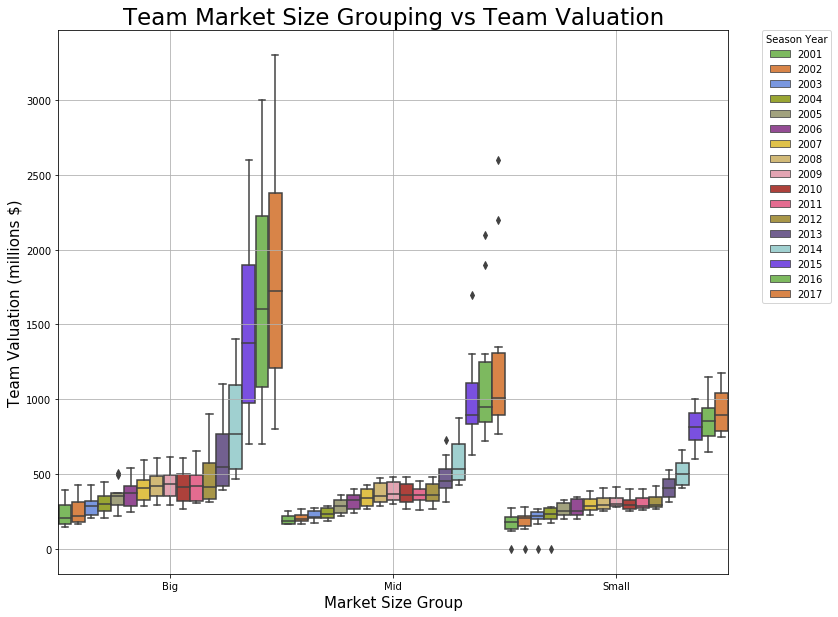

In [13]:
# Generate Box PLot Histogram to Show Team Valuation Distribution

fig, ax = plt.subplots()
fig.set_size_inches(12, 10)

bplot = sns.boxplot(y = "Valuation" , x = "Market_Size" , data = TeamVal_deNorm_DF ,\
                     width = 1 , hue = "Year" , palette = Plot_Colors)

plt.xlabel("Market Size Group" , size = 15)
plt.ylabel("Team Valuation (millions $)" , size = 15)
plt.title("Team Market Size Grouping vs Team Valuation" , size = 23)
plt.legend(bbox_to_anchor = (1.05, 1) , loc = 2 , borderaxespad = 0. , title = "Season Year")
ax.grid(True , which = "Both")

### <font color = blue> Generate Time Series Line Plot of Team Valuations

In [14]:
Trans_TeamValuation_DF = TeamVal_orig_DF.T
# Trans_TeamValuation_DF.head(5)

In [15]:
# Transpose Data Frame to make Year Columns and Team Rows

Trans_TeamValuation_DF.columns = Trans_TeamValuation_DF.iloc[0]
Trans_TeamValuation_DF = Trans_TeamValuation_DF.reindex(Trans_TeamValuation_DF.index.drop("Year"))
Trans_TeamValuation_DF.columns = Trans_TeamValuation_DF.columns.values
Trans_TeamValuation_DF.index = [int(x) for x in Trans_TeamValuation_DF.index.values]

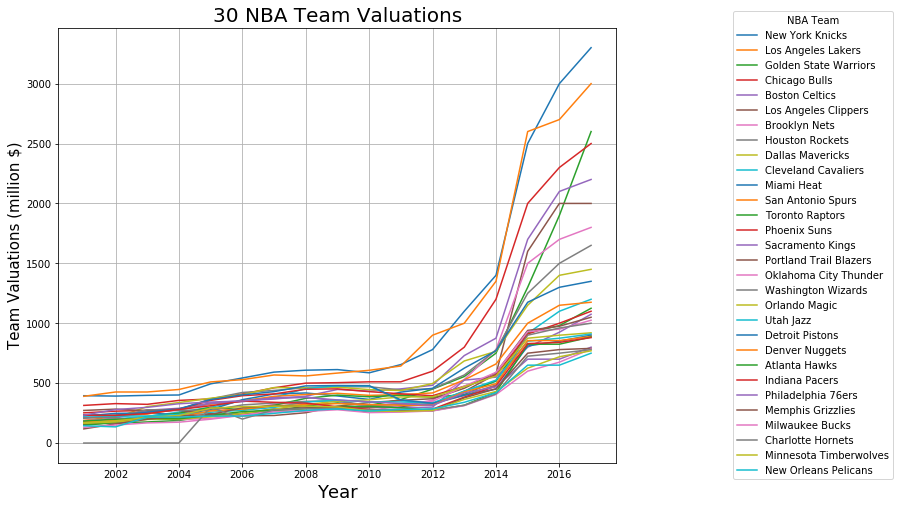

In [16]:
# Plot the results

Trans_TeamValuation_DF.plot()
plt.grid()

plt.legend(loc = "center left" , bbox_to_anchor = (1.2, .5) , title = "NBA Team")
plt.title("30 NBA Team Valuations" , size = 20)
plt.xlabel("Year", size = 18)
plt.ylabel("Team Valuations (million $)" , size = 15)
plt.gcf().set_size_inches(10 , 8 , forward = True)

In [17]:
# Save Image
# plt.savefig("OutputFiles/TeamValuationsPlot.png")

## <font color = Green> Results: Market Rank vs Team Valuation Analysis

> ### ANOVA Result:  p-value = .000000507 
>#### Interpretation: 
<= .05:  Accept Null Hypothesis H0
>>Team valuation means across the different Market Ranks (Big, Med, Small) are NOT statistically different.

# <font color = red> Market Rank vs Team Wins/Losses Analysis </font>
***

## <font color = Green> Results: Market Rank vs Wins/Losses Analysis

> 

# <font color = red> Geographical Census Analysis</font>
***

## <font color = Green> Results: Geographical Census Analysis

> 